In [31]:
import pandas as pd

In [32]:
dataset=pd.read_csv('spam.csv', encoding='latin')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
dataset = dataset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
dataset = dataset.rename(columns={'v1': 'label', 'v2': 'text'})
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [34]:
dataset.isnull().sum()

label    0
text     0
dtype: int64

In [35]:
dataset['label'] = dataset['label'].replace(['ham'],0)
dataset['label'] = dataset['label'].replace(['spam'],1)

In [36]:
ham_count = sum(label == 0 for label in dataset['label'])
spam_count = sum(label == 1 for label in dataset['label'])

print("Ham Count:", ham_count)
print("Spam Count:", spam_count)

Ham Count: 4825
Spam Count: 747


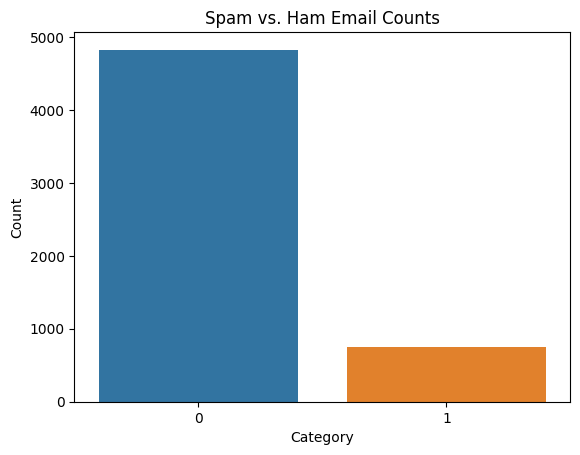

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a countplot
sns.countplot(x=dataset['label'])

# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Spam vs. Ham Email Counts')

# Display the plot
plt.show()

In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources (you only need to do this once)
nltk.download('stopwords')

# Step 2: Data Preprocessing

# Define a function for data preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
dataset['text'].astype(str).apply(preprocess_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                              piti mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: text, Length: 5572, dtype: object

In [40]:
text = ' '.join(dataset['text'])

In [41]:
# Create separate text for spam and ham
spam_text = ' '.join(dataset['text'][i] for i in range(len(dataset['label'])) if dataset['label'][i] == 0)
ham_text = ' '.join(dataset['text'][i] for i in range(len(dataset['label'])) if dataset['label'][i] == 1)


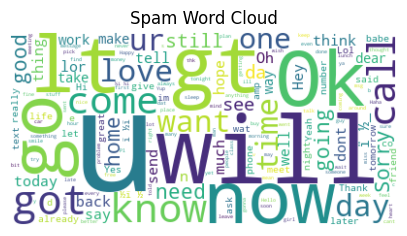

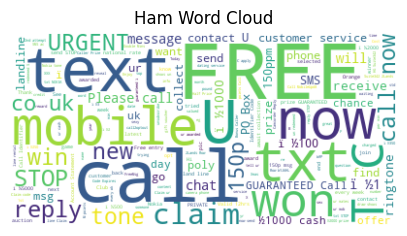

In [42]:
from wordcloud import WordCloud
spam_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(spam_text)
ham_wordcloud = WordCloud(width=400, height=200, background_color='white').generate(ham_text)

# Plot the spam word cloud
plt.figure(figsize=(5, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Word Cloud')
plt.show()

# Plot the ham word cloud
plt.figure(figsize=(5, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Word Cloud')
plt.show()

In [43]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
train_X, test_X, train_Y, test_Y = train_test_split(dataset['text'] ,dataset['label'],test_size = 0.2,random_state = 42)

In [44]:
# Step 3: Feature Extraction
vectorizer = CountVectorizer()  # Create a bag-of-words vectorizer
train_features = vectorizer.fit_transform(train_X) 
test_features = vectorizer.transform(test_X) 

In [45]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [46]:
svm_classifier = SVC()
naive_bayes_classifier = MultinomialNB()
random_forest_classifier = RandomForestClassifier()

In [47]:
# Fit the classifiers on the training data
svm_classifier.fit(train_features, train_Y)
naive_bayes_classifier.fit(train_features, train_Y)
random_forest_classifier.fit(train_features, train_Y)

RandomForestClassifier()

In [48]:
# Make predictions on the test data
svm_predictions = svm_classifier.predict(test_features)
naive_bayes_predictions = naive_bayes_classifier.predict(test_features)
random_forest_predictions = random_forest_classifier.predict(test_features)


In [49]:
# Calculate accuracy scores
svm_accuracy = accuracy_score(test_Y, svm_predictions)
naive_bayes_accuracy = accuracy_score(test_Y, naive_bayes_predictions)
random_forest_accuracy = accuracy_score(test_Y, random_forest_predictions)

In [50]:
# Print the accuracy scores
print("SVM Accuracy:", svm_accuracy)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)

SVM Accuracy: 0.9802690582959641
Naive Bayes Accuracy: 0.9829596412556054
Random Forest Accuracy: 0.9757847533632287


Manual Prediction

In [51]:
new_emails = ['England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/̼1.20 POBOXox36504W45WQ 16','I HAVE A DATE ON SUNDAY WITH WILL!!']
new_features = vectorizer.transform(new_emails)

svm_manual_predictions = svm_classifier.predict(new_features)
naive_bayes_manual_predictions = naive_bayes_classifier.predict(new_features)
random_forest_manual_predictions = random_forest_classifier.predict(new_features)


In [52]:
for email, svm_pred, nb_pred, rf_pred in zip(new_emails, svm_manual_predictions, naive_bayes_manual_predictions, random_forest_manual_predictions):
    print(f'Email: {email}')
    print(f'SVM Prediction: {"Spam" if svm_pred == 1 else "Ham"}')
    print(f'Naive Bayes Prediction: {"Spam" if nb_pred == 1 else "Ham"}')
    print(f'Random Forest Prediction: {"Spam" if rf_pred == 1 else "Ham"}')
    print('---')

Email: England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/̼1.20 POBOXox36504W45WQ 16
SVM Prediction: Spam
Naive Bayes Prediction: Spam
Random Forest Prediction: Spam
---
Email: I HAVE A DATE ON SUNDAY WITH WILL!!
SVM Prediction: Ham
Naive Bayes Prediction: Ham
Random Forest Prediction: Ham
---


In [53]:
from sklearn.metrics import accuracy_score, classification_report

In [54]:
print("SVM Classification Report:")
print(classification_report(test_Y, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [55]:
print("Naive Bayes Classification Report:")
print(classification_report(test_Y, naive_bayes_predictions))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [56]:
print("Random Forest Classification Report:")
print(classification_report(test_Y, random_forest_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

